In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
#Imports
gdata = pd.read_csv("../input/titanic/gender_submission.csv")
test_data = pd.read_csv("../input/titanic/test.csv")
train_data = pd.read_csv("../input/titanic/train.csv")

In [3]:
# STAGE 1 Numerical Summary
age = train_data['Age'].value_counts()
p_class = train_data['Pclass'].value_counts()
sex =  train_data['Sex'].value_counts()
survived = train_data['Survived'].value_counts()
sib_sp = train_data['SibSp'].value_counts()
embarked = train_data['Embarked'].value_counts()
parch = train_data['Parch'].value_counts()
fare = train_data['Fare'].value_counts()

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

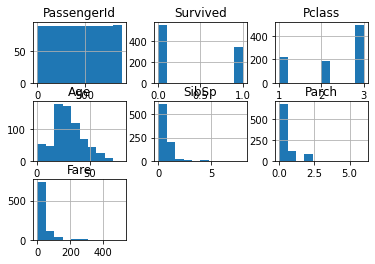

In [4]:
#Graphical distributions of values
train_data.hist()

In [18]:
#Remove all columns that contain more than 5% missing values.
for string in list(train_data) :
    print(string, train_data[string].isna().sum())
    delete = train_data[string].isna().sum()
    if (delete > (0.05 * len(train_data[string]))):
        train_data = train_data.drop(string, 1)
        
train_data.head()

PassengerId 0
Survived 0
Pclass 0
Name 0
Sex 0
SibSp 0
Parch 0
Ticket 0
Fare 0
Embarked 0
Embarked_S 0
Embarked_C 0
Embarked_Q 0


,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Embarked_S,Embarked_C,Embarked_Q
0,1,0,3,"Braund, Mr. Owen Harris",0,1,0,A/5 21171,7.2500,S,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,0,PC 17599,71.2833,C,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,0,0,STON/O2. 3101282,7.9250,S,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,0,113803,53.1000,S,1,0,0
4,5,0,3,"Allen, Mr. William Henry",0,0,0,373450,8.0500,S,1,0,0


In [19]:
#After Step 1, remove any row that has missing values.
temp = train_data[train_data.isna().any(axis=1)].index.values.astype(int)
train_data = train_data.drop(axis = 0, index = temp)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Embarked_S,Embarked_C,Embarked_Q
0,1,0,3,"Braund, Mr. Owen Harris",0,1,0,A/5 21171,7.2500,S,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,0,PC 17599,71.2833,C,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,0,0,STON/O2. 3101282,7.9250,S,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,0,113803,53.1000,S,1,0,0
4,5,0,3,"Allen, Mr. William Henry",0,0,0,373450,8.0500,S,1,0,0


Text(0.5, 1.0, 'Parch and Fare')

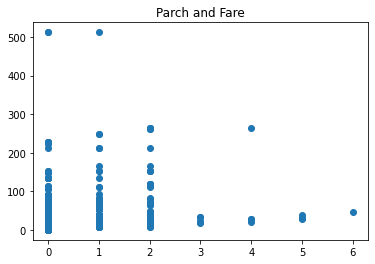

In [7]:
#Prediction Power A good model should only include variables that are indeed related to the task. 
#Use correlation coefficients and scatter plots to decide which variables have strong relationship to passengers’ survival, and which don’t.
import matplotlib.pyplot as plt
%matplotlib inline
train_data.corr()
plt.scatter(train_data['Parch'], train_data['Fare'])
plt.title("Parch and Fare")

In [8]:
# STAGE 2 Converting Categorical Features

train_data['Sex'] = train_data['Sex'].replace(['male'],'0')
train_data['Sex'] = train_data['Sex'].replace(['female'],'1')

In [28]:
#Converting Categorical Features
train_data["Embarked_S"] = 0
train_data["Embarked_C"] = 0
train_data["Embarked_Q"] = 0

for values in train_data.index.values.astype(int):    
    if train_data.loc[values, 'Embarked'] == "S":
        train_data.loc[values, 'Embarked_S'] = 1
    elif train_data.loc[values, 'Embarked'] == "C":
        train_data.loc[values, 'Embarked_C'] = 1
    elif train_data.loc[values, 'Embarked'] == "Q":
        train_data.loc[values, 'Embarked_Q'] = 1

In [10]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
scaler = mms.fit_transform(train_data[["Fare"]])
scaler

array([[0.01415106],
       [0.13913574],
       [0.01546857],
       [0.1036443 ],
       [0.01571255],
       [0.0165095 ],
       [0.10122886],
       [0.04113566],
       [0.02173075],
       [0.05869429],
       [0.03259623],
       [0.05182215],
       [0.01571255],
       [0.06104473],
       [0.01533038],
       [0.03122992],
       [0.05684821],
       [0.02537431],
       [0.03513366],
       [0.01410226],
       [0.05074862],
       [0.02537431],
       [0.01567195],
       [0.06929139],
       [0.04113566],
       [0.06126432],
       [0.01410226],
       [0.51334181],
       [0.01537917],
       [0.01541158],
       [0.0541074 ],
       [0.28598956],
       [0.01512699],
       [0.02049464],
       [0.16038672],
       [0.10149724],
       [0.01411046],
       [0.01571255],
       [0.03513366],
       [0.02194234],
       [0.01849397],
       [0.04098927],
       [0.01541158],
       [0.08115719],
       [0.01537917],
       [0.01571255],
       [0.03025399],
       [0.015

In [11]:
#Extract Validation set
from sklearn.model_selection import train_test_split
traindata, testdata = train_test_split(train_data, test_size = 0.2)

In [12]:
#Building Models
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 3)
input_cols = ['Fare', 'Parch']
model.fit(traindata[['Fare', 'Parch']], traindata['Survived'])
testdata['predicition'] = model.predict(testdata[input_cols])

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(testdata['Survived'], testdata['predicition'])
print(accuracy)


0.6123595505617978


In [13]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(traindata[['Fare', 'Parch']], traindata[['Survived']])
testdata['prediction_2'] = model.predict(testdata[input_cols])

In [14]:
# STAGE 3 Model Selection

# Cross Validation
from sklearn.model_selection import cross_val_score
input_col = ['Fare', 'Parch']
print(cross_val_score(model, traindata[input_cols], traindata['Survived'], cv=5))

[0.59440559 0.66901408 0.66901408 0.69014085 0.59859155]


In [15]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(testdata['Survived'], testdata['predicition'])

array([[66, 30],
       [39, 43]])

In [16]:
#Precision and recall
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(testdata['Survived'], testdata['predicition'])
recall = recall_score(testdata['Survived'], testdata['predicition'])
f1 = f1_score(testdata['Survived'], testdata['predicition'])
print(precision, recall, f1)

0.589041095890411 0.524390243902439 0.5548387096774193


What is the best model?
KNN was the best model, it yielded the best results for the accuracy function.

#Model Interpretation

The results show that the more money spent on the fare correlated in better odds of survival.